In [6]:
import numpy as np
import pandas as pd

This notebook looks into the distribution of completing rates; raw and transformed.

In [16]:
# loading my transformed data
df = pd.read_csv('../raw_data/transformed_data.csv')
df.head()

,user_id,prd_number,series_title,unique_title,platform,device_type,pub_date,episode_duration,genre,branding_channel,mother_channel,category,content_time_spent,date,time,completion_rate
0,00005776ec874bc9ab8ca964cf274858,11032415372,Kampen om historien,Kampen om historien: Jihadismen og kampen mod ...,app,Mobile Phone,2024-09-10,3416,Historie,DR P1,DR P1,Oplysning og kultur,1140,2024-09-10,14:44:00,0.333724
1,00005776ec874bc9ab8ca964cf274858,11032415392,Kampen om historien,Kampen om historien: Midt i en ny mellemkrigst...,app,Mobile Phone,2024-09-24,3416,Historie,DR P1,DR P1,Oplysning og kultur,1257,2024-10-08,10:51:00,0.367974
2,00005776ec874bc9ab8ca964cf274858,11032415412,Kampen om historien,Kampen om historien: Gaskamrene er en detalje ...,app,Tablet,2024-10-08,3393,Historie,DR P1,DR P1,Oplysning og kultur,3395,2024-11-28,09:42:00,1.000000
3,00005776ec874bc9ab8ca964cf274858,11032415422,Kampen om historien,Kampen om historien: Libanons lange krig - kri...,app,Mobile Phone,2024-10-15,3427,Historie,DR P1,DR P1,Oplysning og kultur,3425,2024-10-30,09:39:00,0.999416
4,00005776ec874bc9ab8ca964cf274858,11032415432,Kampen om historien,Kampen om historien: Hvad har amerikanerne lær...,app,Mobile Phone,2024-10-22,3365,Historie,DR P1,DR P1,Oplysning og kultur,4681,2024-12-01,10:27:00,1.000000


<Axes: >

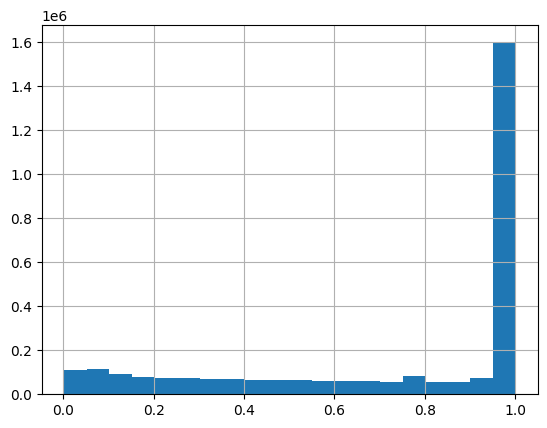

In [20]:
# histogram of completion rates
df['completion_rate'].hist(bins=20)

<Axes: >

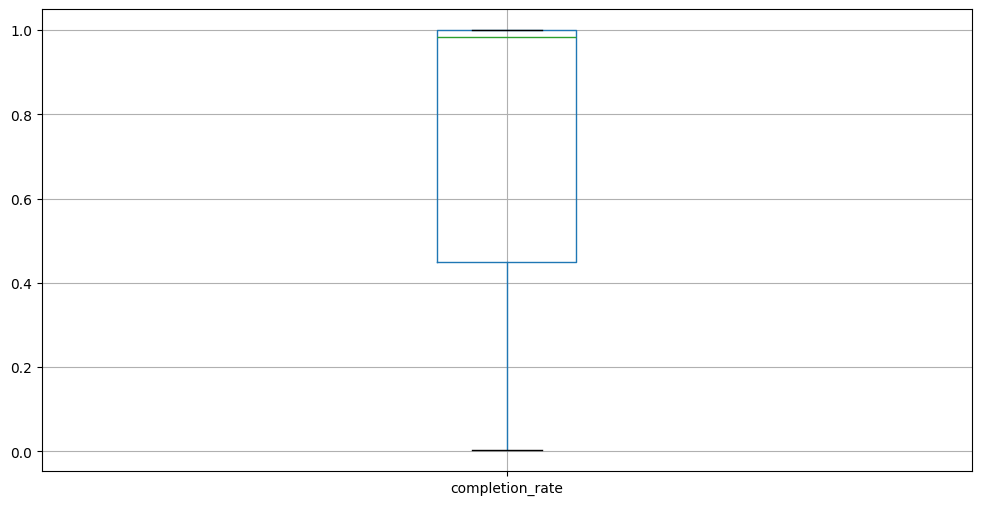

In [24]:
# boxplot of raw completion rates
df.boxplot(column='completion_rate', figsize=(12, 6))

Applying a negative log transformation, $f(x)=-\log(1-x)$, to the raw completion rates to balance them out on a more equal scale. This should avoid most of the rates to be in range $[0.95,1]$.

<Axes: >

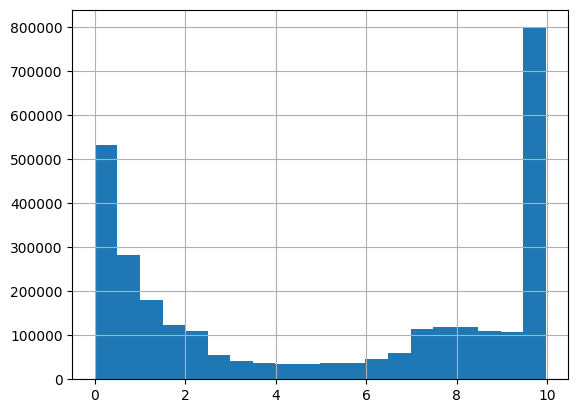

In [31]:
# subtracting a small value from completion rates that are equal to 1
df["cr_short"] = df["completion_rate"] - 0.001

# applying the negative log transformation
df["cr_neg_log"] = -np.log2(1 - df["cr_short"])

# histogram of the transformed completion rates
df["cr_neg_log"].hist(bins=20)

<Axes: >

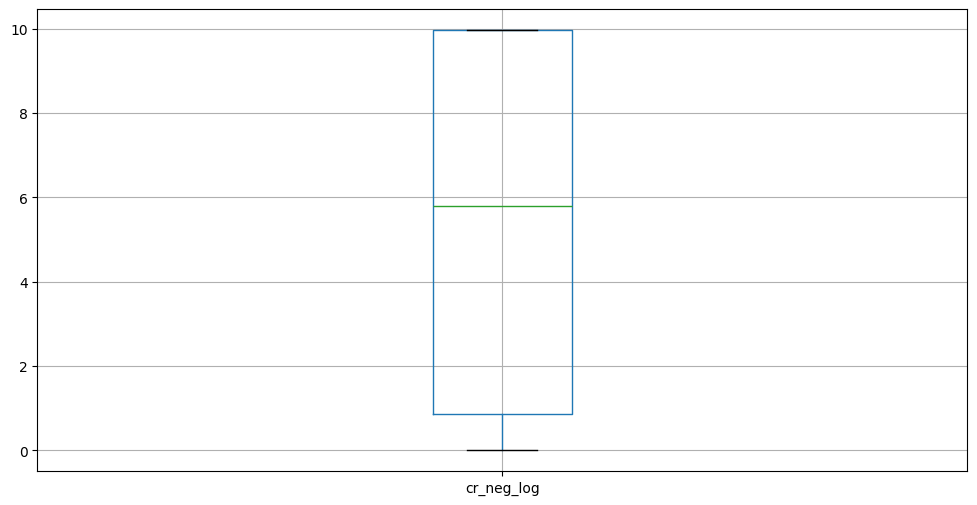

In [25]:
# boxplot of transformed completion rates
df.boxplot(column='cr_neg_log', figsize=(12, 6))